<a href="https://colab.research.google.com/github/Storm00212/QUANT/blob/main/MILLENIUM_ALGO_N%26Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab code to simulate a quant finance model with a risk/reward surface and performance charts.
# This is a simplified simulation based on the provided image description.
# Assumptions:
# - The 3D surface represents a risk/reward landscape (e.g., expected return vs. risk vs. time or parameters).
# - The model applies a weighting function during specific trading hours (9:30-12:30 ET).
# - For simplicity, we use synthetic data to mimic S&P 500 returns and an "algo" that outperforms it.
# - The equation is displayed as text in the plot.
# - Run this in Google Colab with %matplotlib inline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

In [2]:
# Enable inline plotting
%matplotlib inline

In [3]:
# Function to generate a synthetic risk/reward surface
def generate_surface():
    x = np.linspace(0, 200, 100)
    y = np.linspace(0, 50, 100)
    X, Y = np.meshgrid(x, y)
    # Synthetic function to mimic the wavy surface in the image (adjust as needed)
    Z = 20 * np.sin(X / 20) * np.cos(Y / 10) + 30 + np.random.normal(0, 5, X.shape)
    return X, Y, Z

# Function to simulate performance data
def simulate_performance(num_days=365):
    np.random.seed(42)  # For reproducibility
    dates = [datetime.date(2025, 1, 1) + datetime.timedelta(days=i) for i in range(num_days)]

    # Synthetic S&P 500 buy-and-hold: moderate returns with volatility
    sp_returns = np.random.normal(0.0005, 0.01, num_days)  # Daily returns ~0.05% mean, 1% std
    sp_cumulative = 15000 * np.cumprod(1 + sp_returns)

    # Synthetic Millennium Algo: higher returns, but only "trades" in morning hours (simulated by boosting returns)
    # Assume the weighting u(t) amplifies returns during "trading window" (simulated as random boost)
    algo_returns = sp_returns + np.random.normal(0.0008, 0.005, num_days)  # Higher mean
    algo_cumulative = 15000 * np.cumprod(1 + algo_returns)

    return dates, sp_cumulative, algo_cumulative

In [4]:
# Generate data
X, Y, Z = generate_surface()
dates, sp_values, algo_values = simulate_performance()

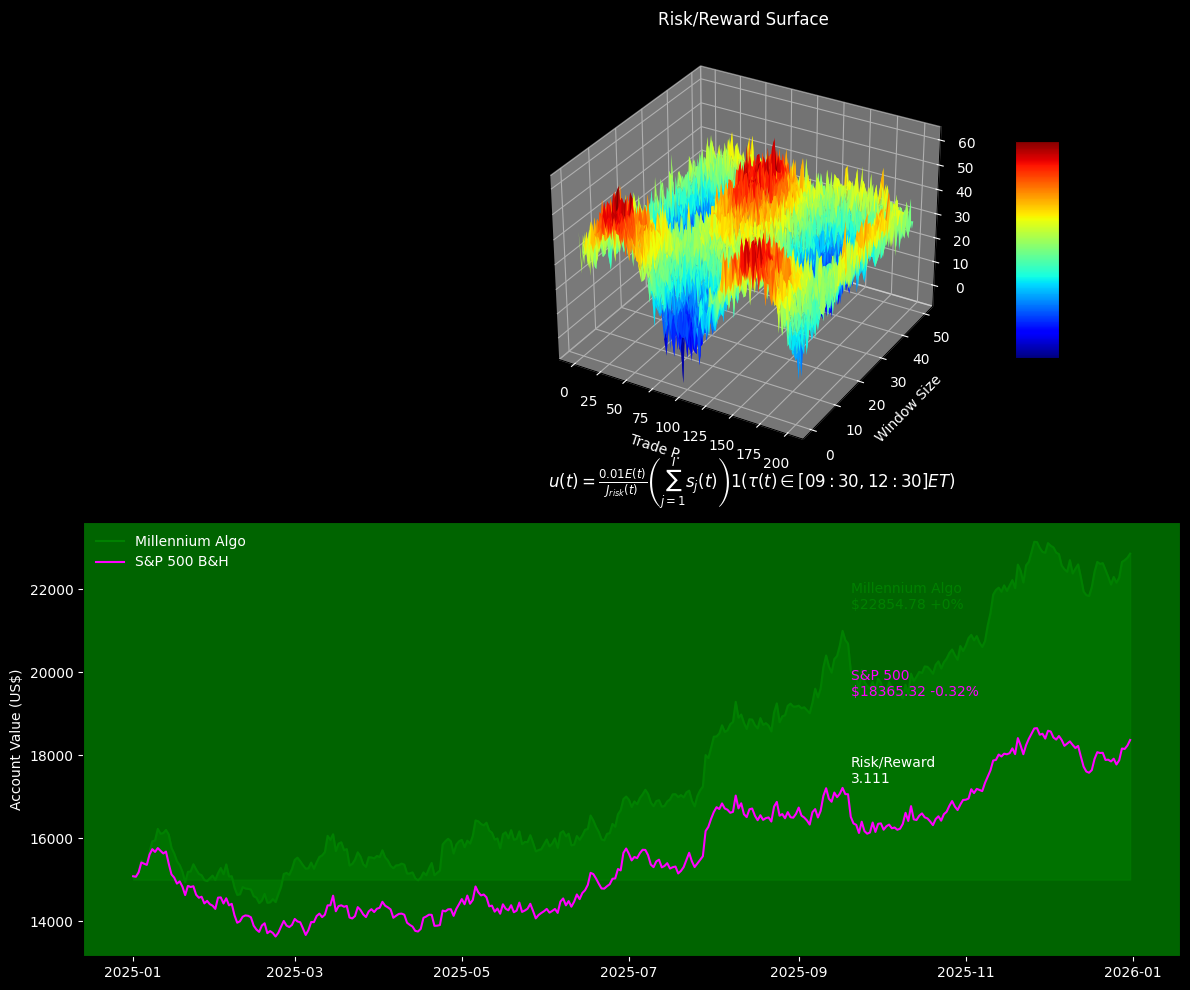

In [5]:
# Create the figure with two subplots: top for 3D surface, bottom for line chart
fig = plt.figure(figsize=(12, 10), facecolor='black')

# Top subplot: 3D Risk/Reward Surface
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax1.set_facecolor('black')
surf = ax1.plot_surface(X, Y, Z, cmap='jet', rstride=1, cstride=1, antialiased=True)
ax1.set_xlabel('Trade P.', color='white')
ax1.set_ylabel('Window Size', color='white')
ax1.set_zlabel(' ', color='white')
ax1.tick_params(colors='white')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Add equation text
equation = r'$u(t) = \frac{0.01 E(t)}{J_{risk}(t)} \left( \sum_{j=1}^{I} s_j(t) \right) 1(\tau(t) \in [09:30, 12:30]ET)$'
ax1.text2D(0.05, -0.05, equation, transform=ax1.transAxes, color='white', fontsize=12)

# Add title
ax1.set_title('Risk/Reward Surface', color='white')

# Bottom subplot: Performance chart
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_facecolor('darkgreen')
ax2.fill_between(dates, 15000, algo_values, color='green', alpha=0.5)
ax2.plot(dates, algo_values, color='green', label='Millennium Algo')
ax2.plot(dates, sp_values, color='magenta', label='S&P 500 B&H')
ax2.legend(loc='upper left', fontsize=10, frameon=False, labelcolor='white')
ax2.set_ylabel('Account Value (US$)', color='white')
ax2.tick_params(colors='white')
ax2.grid(False)

# Add performance metrics (using final values)
algo_final = algo_values[-1]
sp_final = sp_values[-1]
ax2.text(0.7, 0.8, f'Millennium Algo\n${algo_final:.2f} +0%', transform=ax2.transAxes, color='green', fontsize=10)
ax2.text(0.7, 0.6, f'S&P 500\n${sp_final:.2f} -0.32%', transform=ax2.transAxes, color='magenta', fontsize=10)
ax2.text(0.7, 0.4, 'Risk/Reward\n3.111', transform=ax2.transAxes, color='white', fontsize=10)

plt.tight_layout()
plt.show()

## Simulating the equation

In [7]:
# Google Colab code to simulate the equation u(t) = 0.01 * E(t) / J_risk(t) * sum(s_j(t)) * indicator(morning hours)
# This is a deeper simulation: Generates synthetic intraday data for a stock (e.g., TSLA-like),
# calculates E(t), J_risk(t), signals, and u(t) over time, only during 9:30-12:30 ET.
# Plots the bet size u(t) over the trading day, with explanations.
# Assumptions: Synthetic price data with morning volatility spike. Real algos use live feeds.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import pytz  # For timezones


In [8]:
%matplotlib inline

# Set timezone to ET (Eastern Time)
et_tz = pytz.timezone('US/Eastern')

In [9]:

# Simulate one trading day: From market open 9:30 ET to close 16:00 ET
start_time = datetime(2024, 1, 1, 9, 30, tzinfo=et_tz)
end_time = datetime(2024, 1, 1, 16, 0, tzinfo=et_tz)
time_step = timedelta(minutes=1)  # 1-minute bars for simplicity
times = pd.date_range(start_time, end_time, freq=time_step)[:-1]  # Exclude exact close

num_steps = len(times)
print(f"Simulating {num_steps} minutes of trading.")


Simulating 390 minutes of trading.


In [10]:
# Synthetic stock price: Base random walk, spike volatility in morning (9:30-12:30)
np.random.seed(42)
prices = np.cumsum(np.random.normal(0, 0.1, num_steps)) + 100  # Start at $100

# Boost morning volatility: Higher std dev from 9:30 to 12:30
morning_start_idx = 0
morning_end_idx = int((datetime(2024,1,1,12,30,tzinfo=et_tz) - start_time) / time_step)
prices[:morning_end_idx] += np.cumsum(np.random.normal(0, 0.3, morning_end_idx))  # Wilder moves


In [11]:

# Function to check if in morning window [9:30, 12:30] ET
def is_morning(t):
    t_et = t.astimezone(et_tz)
    return t_et.time() >= datetime.strptime('09:30', '%H:%M').time() and \
           t_et.time() <= datetime.strptime('12:30', '%H:%M').time()


In [12]:

# Simulate parameters per time step
E_t = np.zeros(num_steps)      # Expected value
J_risk_t = np.zeros(num_steps) # Risk
sum_sj_t = np.zeros(num_steps) # Sum of signals
u_t = np.zeros(num_steps)      # Bet size
